In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/NKG Historical Data.csv', sep=";")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [3]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [4]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [5]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[8.36528841 8.35198879 8.33868916 8.32538953 8.3120899  8.29879028
 8.28549065 8.27219102 8.25889139 8.24559177 8.23229214 8.21899251
 8.20569288 8.19239325 8.17909363 8.165794   8.15249437 8.13919474
 8.12589512 8.11259549 8.09929586 8.08599623 8.07269661 8.05939698
 8.04609735 8.03279772 8.0194981  8.00619847 7.99289884 7.97959921]


In [6]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 5.716784970293997
Testing MAPE: 130.83011197197249
Testing MAE: 5.633021575000324


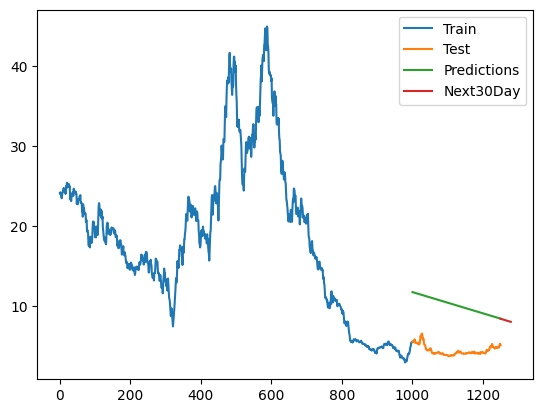

In [7]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [8]:
# 9. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[8.36528841 8.35198879 8.33868916 8.32538953 8.3120899  8.29879028
 8.28549065 8.27219102 8.25889139 8.24559177 8.23229214 8.21899251
 8.20569288 8.19239325 8.17909363 8.165794   8.15249437 8.13919474
 8.12589512 8.11259549 8.09929586 8.08599623 8.07269661 8.05939698
 8.04609735 8.03279772 8.0194981  8.00619847 7.99289884 7.97959921
 7.96629959 7.95299996 7.93970033 7.9264007  7.91310107 7.89980145
 7.88650182 7.87320219 7.85990256 7.84660294 7.83330331 7.82000368
 7.80670405 7.79340443 7.7801048  7.76680517 7.75350554 7.74020592
 7.72690629 7.71360666 7.70030703 7.6870074  7.67370778 7.66040815
 7.64710852 7.63380889 7.62050927 7.60720964 7.59391001 7.58061038]


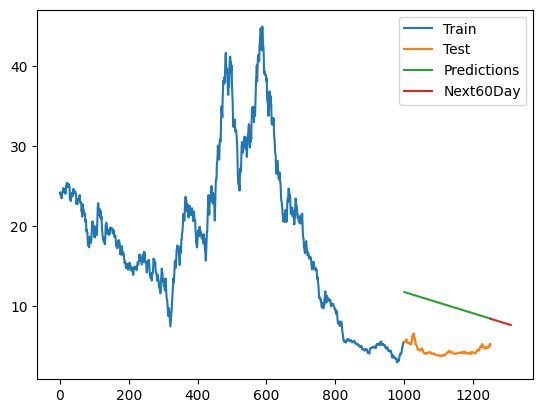

In [9]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

In [10]:
# 10. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[8.36528841 8.35198879 8.33868916 8.32538953 8.3120899  8.29879028
 8.28549065 8.27219102 8.25889139 8.24559177 8.23229214 8.21899251
 8.20569288 8.19239325 8.17909363 8.165794   8.15249437 8.13919474
 8.12589512 8.11259549 8.09929586 8.08599623 8.07269661 8.05939698
 8.04609735 8.03279772 8.0194981  8.00619847 7.99289884 7.97959921
 7.96629959 7.95299996 7.93970033 7.9264007  7.91310107 7.89980145
 7.88650182 7.87320219 7.85990256 7.84660294 7.83330331 7.82000368
 7.80670405 7.79340443 7.7801048  7.76680517 7.75350554 7.74020592
 7.72690629 7.71360666 7.70030703 7.6870074  7.67370778 7.66040815
 7.64710852 7.63380889 7.62050927 7.60720964 7.59391001 7.58061038
 7.56731076 7.55401113 7.5407115  7.52741187 7.51411225 7.50081262
 7.48751299 7.47421336 7.46091374 7.44761411 7.43431448 7.42101485
 7.40771522 7.3944156  7.38111597 7.36781634 7.35451671 7.34121709
 7.32791746 7.31461783 7.3013182  7.28801858 7.27471895 7.26141932
 7.24811969 7.2

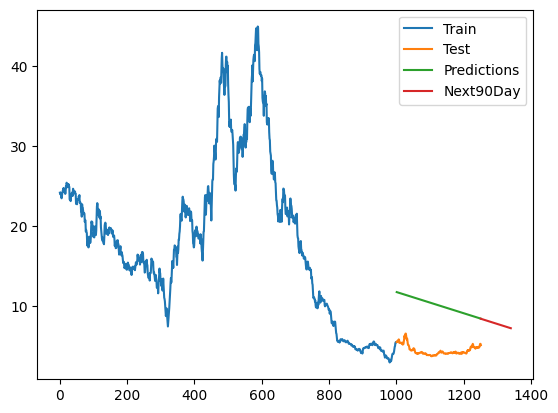

In [11]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()